Life Expectancy Analysis

Adarsh Reddy Madur\
210050091

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/adarsh/Downloads/Life Expectancy Data.csv')
df = df.dropna()
df = df.reset_index(drop=True)

Firstly, we have to make sure we have the correct variables. 
Some of the factors (variables) may be dependent (correlated). To identify those variables we have to plot the correlation matrix. 

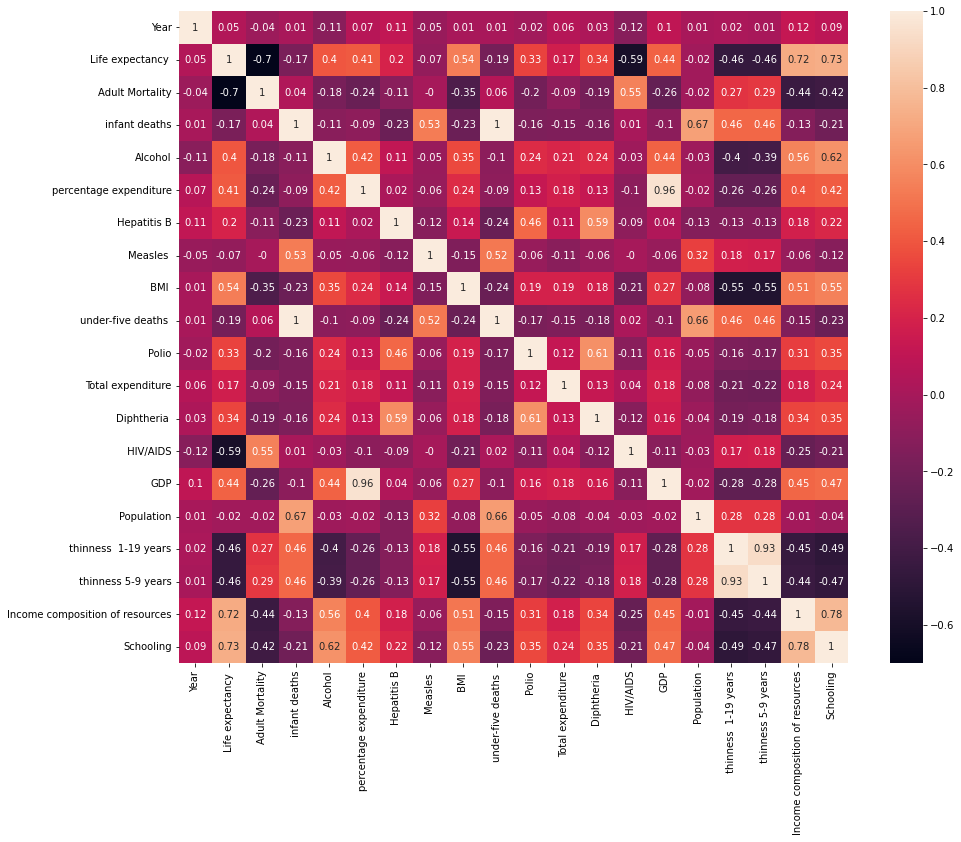

In [3]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(12)
cor = df.corr().round(2)
sns.heatmap(data=cor, annot = True)
plt.show()

Let us club some variables that have high correlation - magnitude above or equal to 0.8. Namely,

1. Under five year deaths and Infant deaths
2. GDP and percentage expenditure
3. thinness 5-9 years and thinness 1-19 years
4. Income composition of resources and Schooling 



Answers to the questions:

1. The variables that effect the life expectancy should have a significant correlation with life expectancy. I am discarding the variables that have magnitude of correlation less than 0.1, namely, 'Year' and 'Population'. Some of the variables (mentioned above) have high correlation with each other, so, considering one from each pair would be sufficient. The most significant factors effecting life expectancy are - 'Adult Mortality'(negative), 'BMI' (positive), 'HIV/AIDS' (negative) and Schooling, Income composition of resources (positive). It is surprising to find that certain diseases have a positive impact on Life expectancy (wonder why?).

2. Clearly both 'Adult Mortality' and 'Infant death' have a negative impact on Life expectancy (from the above correlation matrix). This can also be explained qualitatively : as 'Adult Mortality' and 'Infant death' increase, the average age at death obviously decreases. (The exact values of imact can be calculated using Linear regression)

3. Life expectancy has a positive impact with increased income (hence more food, better lifestyle)and increased alcohol consumption (surprising). There is no data here on smoking but it obviously would have negative impact.

4. Schooling has the highest positive impact on life expectancy

5. Positive 

6. Population density has a small negative correlation with population. That means that only population doesn't say much. Life expectancy depends on how some other factors are handled.

7. Done below. Note that I may have wrongly dropped/included some necessary/unnecessary variables. Since, I have written a class, to add/delete a variable, we just have to modify the variables X and y.





In [4]:
class LinReg(object):
    
    def __init__(self, X, Y):
        '''X and Y have to be np arrays'''
        self.X = X                                   
        self.y = Y
        self.t0 = 0
        try:
            self.n = np.shape(self.X)[1]
        except:
            self.n = 1
        self.t = np.zeros(self.n)
        self.i = 0
        self.Xmin = np.array([])
        self.Xmax = np.array([])
        self.ymin = 0
        self.ymax = 0
        self.minmax()
        self.error = np.array([])
        
    def minmax(self):
        for i in range (0, self.n):
            try:
                self.Xmin = np.append(self.Xmin, np.min(X[:, i]))
                self.Xmax = np.append(self.Xmax, np.max(X[:, i]))
            except:
                self.Xmin = np.append(self.Xmin, np.min(X))
                self.Xmax = np.append(self.Xmax, np.max(X))
        self.ymax = np.max(y)
        self.ymin = np.min(y)
        
    def normalize(self, x, b = False, is_y = False):
        if is_y and not b:
            return (x - self.ymin)/(self.ymax-self.ymin)
        elif not b:
            X = np.zeros(self.n)
            for i in range(0, self.n):
                try:
                    X[i] = (x[i] - self.Xmin[i])/(self.Xmax[i] - self.Xmin[i])
                except:
                    X = (x - self.Xmin)/(self.Xmax - self.Xmin)
            return X
        else:
            return (self.ymax-self.ymin)*x + self.ymin
        
    def h(self, X):
        try:
            return self.t0 + np.matmul(np.transpose(self.t), X)
        except:
            return self.t0 + self.t*X
    
    def iterate(self, alpha, full = False):
        try:
            X = self.normalize(self.X[self.i,:])
        except:
            X = self.normalize(self.X[self.i])
        y = self.normalize(self.y[self.i], False, True)
        self.t0 += alpha*(y-self.h(X))
        self.t += alpha*(y-self.h(X))*X
        self.i += 1
        self.training_error(full)
        
    def run(self, alpha, N, full = False):
        for i in range (0, N):
            self.iterate(alpha, full)
            
    def coefficients(self):
        return (self.t0, self.t)
    
    def training_error(self, full = False):
        X = np.array([])
        j = self.i
        if full:
            j = np.shape(self.y)[0]
        for i in range (0, j):
            try:
                X = np.append(X, self.final_model(self.X[i,:]))
            except:
                X = np.append(X, self.final_model(self.X[i]))
        E = self.y[0:j] - X
        e = np.std(E)
        self.error = np.append(self.error, e)
    
    def final_model(self, x):
        return self.normalize(self.h(self.normalize(x)), True)
    
    def plot_training_error(self):
        f = plt.figure()
        f.set_figwidth(15)
        f.set_figheight(12)
        plt.plot(self.error)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Training Error')

Explanation of the class LinReg:

Class Attributes-
1. self.X $\implies$ stores the independent variables' values 
2. self.y $\implies$ stores the dependent variable values
3. self.n $\implies$ stores the number of independent variables
4. self.i $\implies$ is the current iteration number
5. self.t0 and self.t $\implies$ store the values of $\{\theta_0,\theta_1,\dots,\theta_n\}$ of the current iteration
6. self.Xmin, self.Xmax, self.ymin and self.ymax $\implies$ used for normalization
7. self.error $\implies$ stores the training error values

Functions-
1. minmax $\implies$ It is used to assign correct values to self.Xmin, self.Xmax, self.ymin and self.ymax
2. normalize $\implies$ It is used for normalization. B = True to convert from normalized to true value. is_y = True if y is normalized and False if X is being converted. Convertion from normalized to true value is only written for y as it is not useful for X.
3. h $\implies$ is the hypothesis (using the current $\theta$)
4. iterate $\implies$ performs one iteration
5. run $\implies$ runs N iterations using the learning rate alpha
6. coefficients $\implies$ returns the coefficients - $\{\theta_0,\theta_1,\dots,\theta_n\}$. Note that these coefficients are not the true ones and should be used only on normalized X
7. training_error $\implies$ it calculates the training error and appends to self.error. There are two variants of this function. If full = False, the error in each step is calculated using only $0 \leq i \leq$ self.i. If full = True, the error in each step is calculated using the entre data set.
8. final_model $\implies$ uses the currently stored $\theta$ to calculate the output given the input (input not normalized)
9. plot_training_error $\implies$ plots self.error (on y) vs i (on x)

The try-except blocks have been used to handle situations where there is only one independent variable.


In [5]:
y = df['Life expectancy ']
X = df.drop(['Country' ,'Life expectancy ', 'Status' ,'percentage expenditure', 'under-five deaths ', 
            'Population', ' thinness 5-9 years', 'Income composition of resources', 'Year'], axis = 1)
# X = df.drop(['Country' ,'Life expectancy ', 'Status'], axis = 1)
y = y.to_numpy()
X = X.to_numpy()   

To add/drop variables use the above block

In [6]:
L = LinReg(X,y) 
L.run(0.1, 1400)

In [7]:
print(L.y[1600], L.final_model(L.X[1600,:]), L.error)

68.3 71.39866555742772 [0.         2.66611838 2.63618954 ... 4.6239172  4.62614459 4.62853016]


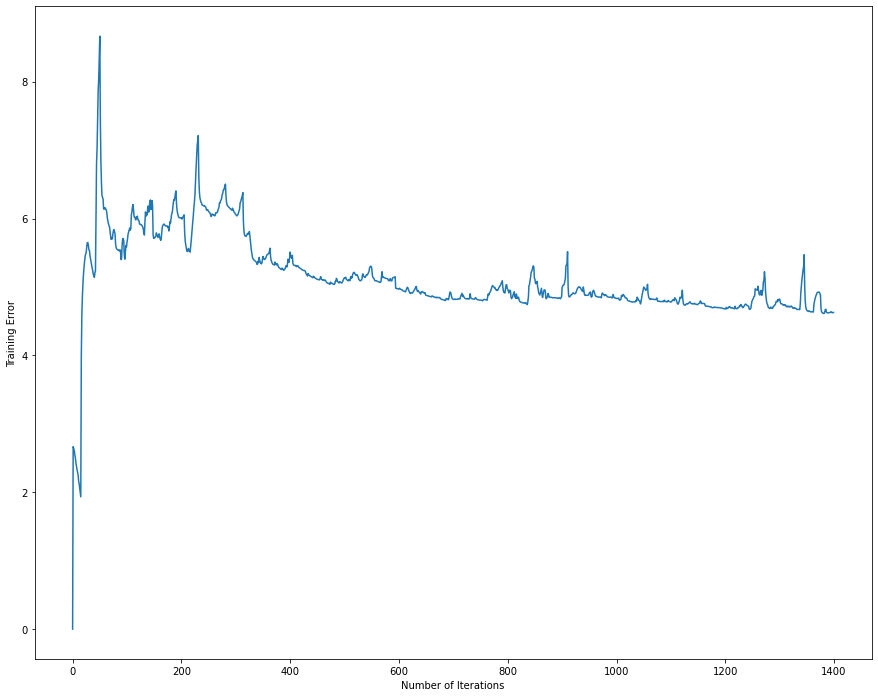

In [8]:
L.plot_training_error()

The graph above plots the standard deviation of calculted values (till the $i^\text{th}$ data point using the hypothesis at $i^\text{th}$ iteration) from true values.

In [9]:
K = LinReg(X,y) 
K.run(0.1, 1400, True)

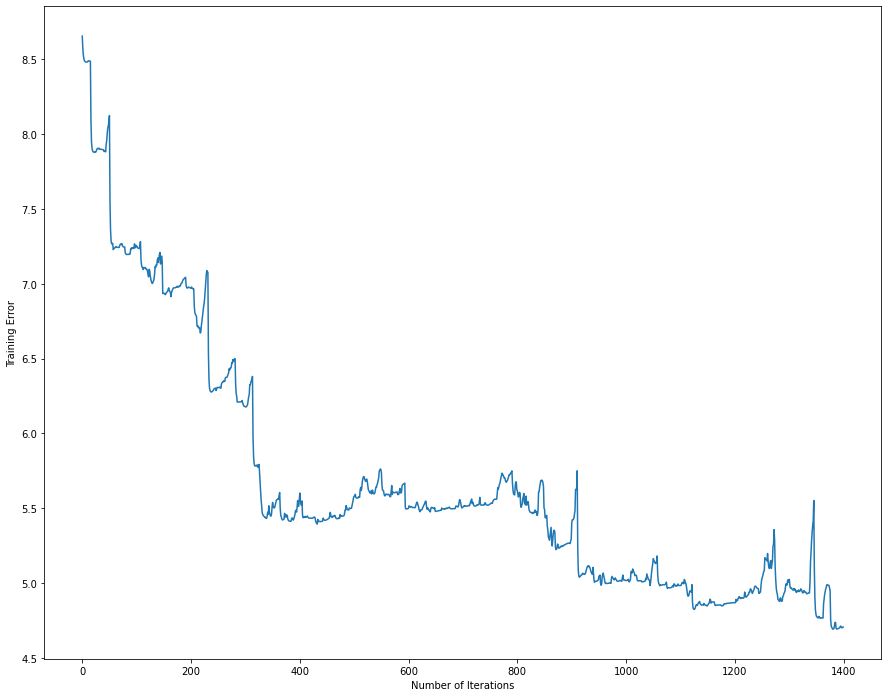

In [10]:
K.plot_training_error()

The graph above plots the standard deviation of calculted values (using all trained/untrained the data points using the hypothesis at $i^\text{th}$ iteration) from true values.